In [3]:
from __future__ import print_function
import numpy as np
import pandas as pd
from tensorflow.python import keras
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D

from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
#import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
!pip install --upgrade pip
!pip install --upgrade absl-py


Looking in indexes: http://aicentro-nexus-svc.aicentro-system:8081/hub-nexus/repository/pypi-group/simple
     |████████████████████████████████| 1.5 MB 84.9 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 20.1
    Uninstalling pip-20.1:
      Successfully uninstalled pip-20.1
Looking in indexes: http://aicentro-nexus-svc.aicentro-system:8081/hub-nexus/repository/pypi-group/simple
Requirement already up-to-date: absl-py in /usr/local/lib/python3.6/dist-packages (0.10.0)


# SACP AI 포탈과 연계를 위한 기본 객체 생성

In [4]:
from aicentro.session import Session
sacp_session = Session(verify=False)

# 학습 모델 개발 시 프레임워크별 객체 사용


In [5]:
from aicentro.framework.keras import Keras as SacpFrm
sacp_framework = SacpFrm(session=sacp_session)


# 모델 코드 작성


In [6]:
batch_size = 128
num_classes = 3
epochs = 100

data = load_iris()

X = data.data
y = data.target
encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values


X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    random_state=1)

model = Sequential()
model.add(Dense(64,input_shape=(4,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________



# 모델 학습 시 Accuracy 와 Loss 값을 SACP AI 포탈로 전송하여 UI 상에 노출
* 제공된 Metric Callback 사용 

In [7]:
history = sacp_framework.get_metric_callback()

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[history])

y_test_pred = model.predict(X_test, batch_size=128, verbose=1)
y_label = data.target_names.tolist()

y_test_c = np.argmax(y_test, axis=1).reshape(-1, 1)
y_test_pred_c = np.argmax(y_test_pred, axis=1).reshape(-1, 1)

Epoch 1/100
1/1 [==============================] - 0s 229ms/step - loss: 1.2149 - accuracy: 0.3667 - val_loss: 1.2814 - val_accuracy: 0.2000
Epoch 2/100
1/1 [==============================] - 0s 54ms/step - loss: 1.1524 - accuracy: 0.3667 - val_loss: 1.1957 - val_accuracy: 0.2000
Epoch 3/100
1/1 [==============================] - 0s 54ms/step - loss: 1.1009 - accuracy: 0.3667 - val_loss: 1.1256 - val_accuracy: 0.2000
Epoch 4/100
1/1 [==============================] - 0s 49ms/step - loss: 1.0535 - accuracy: 0.3667 - val_loss: 1.0669 - val_accuracy: 0.2000
Epoch 5/100
1/1 [==============================] - 0s 51ms/step - loss: 1.0067 - accuracy: 0.3667 - val_loss: 1.0178 - val_accuracy: 0.2333
Epoch 6/100
1/1 [==============================] - 0s 52ms/step - loss: 0.9628 - accuracy: 0.3667 - val_loss: 0.9811 - val_accuracy: 0.2333
Epoch 7/100
1/1 [==============================] - 0s 47ms/step - loss: 0.9232 - accuracy: 0.3750 - val_loss: 0.9535 - val_accuracy: 0.5333
Epoch 8/100
1/1 [==

# 모델 학습 후 결과를 저장하고 해당 결과를 UI 상에 노출

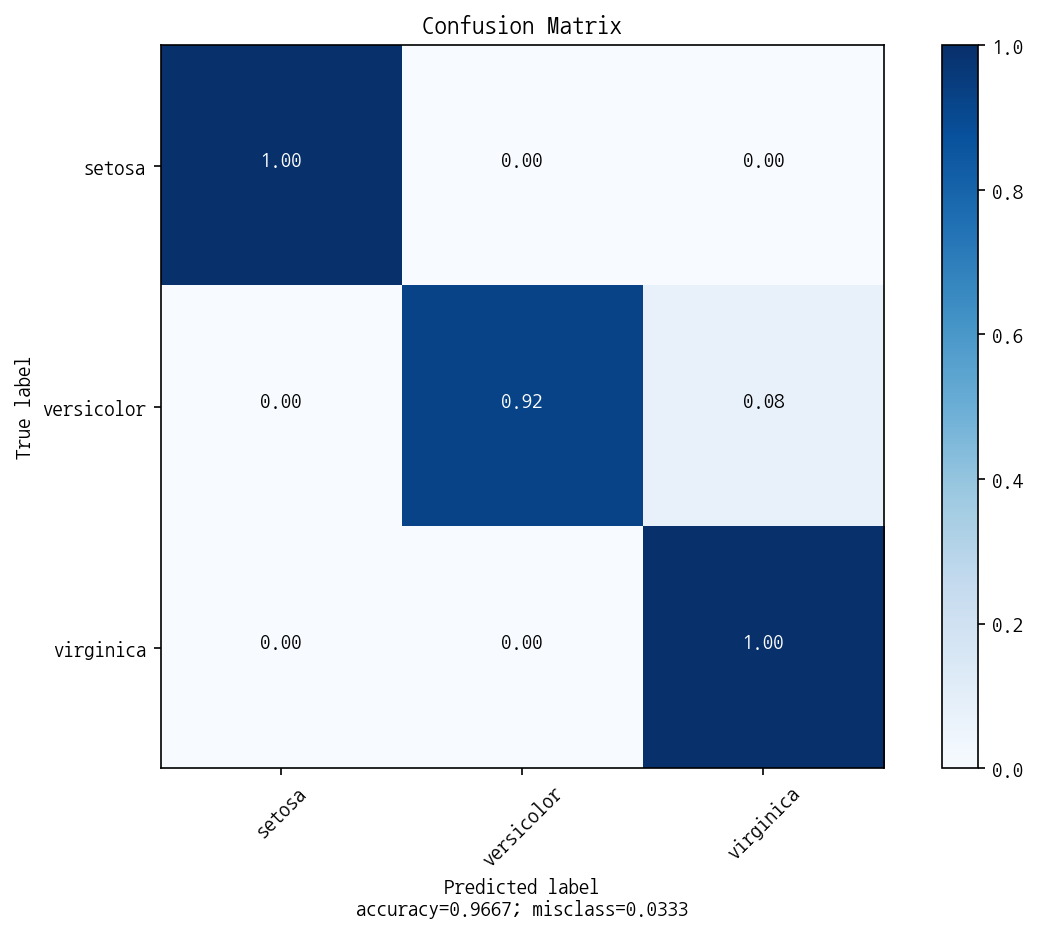

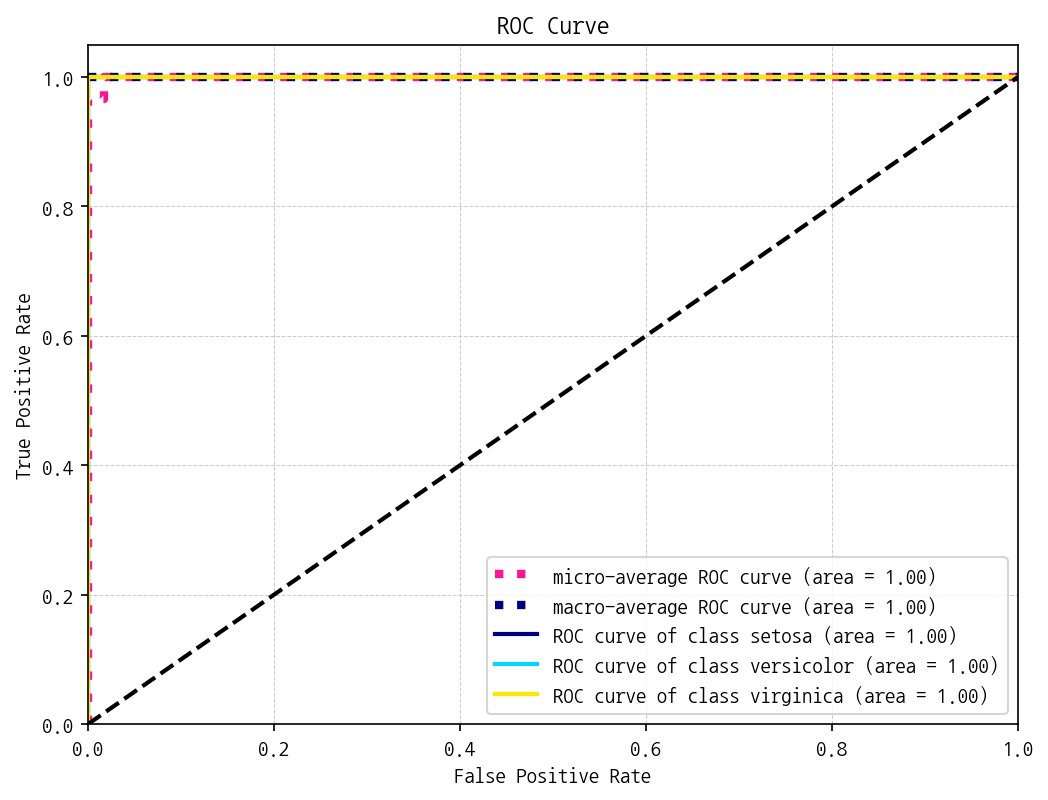

In [8]:
sacp_framework.plot_confusion_matrix(y_test_c, y_test_pred_c, target_names=y_label, title='Confusion Matrix')
sacp_framework.classification_report(y_test_c, y_test_pred_c, target_names=y_label)
sacp_framework.plot_roc_curve(y_test, y_test_pred, len(y_label), y_label)

# 학습된 모델 저장

In [9]:
sacp_framework.save_model(model, model_name='iris-classification')

In [10]:
!ls -R /task/model/

/task/model/:
1

/task/model/1:
iris-classification.h5
